#### Ensemble 학습

- 보팅 (Voting)  : 같은 데이터 셋트를 이용하고 서로 다른 분류 알고리즘을 활용해서 최종 예측

- 배깅 (Bagging) : 데이터 샘플링을 통해서 서브셋트를 만들고 같은 분류 알고리즘을 활용해서 최종 예측

- 

- 보팅유형 하트보팅(다수결) vs 소프트 보팅(확률)

- 배깅유형 : 랜덤 포레스트 (DecisionTreeClassifier) -> 확률

In [89]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier

# SVM add
from sklearn.svm          import SVC

# knn add
from sklearn.neighbors    import KNeighborsClassifier

# ensemble add
from sklearn.ensemble     import VotingClassifier
from sklearn.ensemble     import RandomForestClassifier

from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# datasets
from sklearn.datasets import load_breast_cancer

#### Voting Classifier

In [9]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
cancerDF = pd.DataFrame(cancer.data,
                       columns = cancer.feature_names)
cancerDF

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
# Voting 연습

In [12]:
from sklearn.datasets import load_digits

In [15]:
mnist = load_digits()
# mnist.keys()
features, labels = mnist.data, mnist.target

In [17]:
features.shape

(1797, 64)

In [18]:
labels.shape

(1797,)

In [36]:
X_train, X_test, y_train, y_test = train_test_split (features,
                                                     labels,
                                                     test_size = 0.2,
                                                     random_state= 100) 

In [37]:
# AUC 성능평가 확인

def metrics_evaluation(y_test, y_pred) :
    print("정확도 : {} , 정밀도 : {} , 재현율 : {} , 조화평균(F1) : {} , AUC : {} "
          .format(accuracy_score(y_test, y_pred) , 
                  precision_score(y_test, y_pred) , 
                  recall_score(y_test, y_pred) , 
                  f1_score(y_test, y_pred) , 
                  roc_auc_score(y_test, y_pred) ) )

In [56]:
dt = DecisionTreeClassifier(criterion = 'entropy',
                           max_depth = 8,
                           max_features = 32,
                           random_state = 35)

model   = dt.fit(X_train, y_train)
dt_pred = model.predict(X_test)

knn = KNeighborsClassifier(n_neighbors = 299)
knn.fit (X_train, y_train)
knn_pred = knn.predict(X_test)

svm = SVC(probability=True)
svm.fit (X_train, y_train)
svm_pred = svm.predict(X_test)

In [57]:
# print ('target :',y_test)
# print ('prediction :', dt_pred)
print ('tree :', accuracy_score(y_test, dt_pred))
print ('knn  :', accuracy_score(y_test, knn_pred))
print ('svm  :', accuracy_score(y_test, svm_pred))

tree : 0.8694444444444445
knn  : 0.8555555555555555
svm  : 0.9916666666666667


In [65]:
voting_clf = VotingClassifier(estimators = [('tree',dt),('knn', knn),('svm', svm)],
                              weights = [1,1,1],
                              voting  = 'hard')

voting_clf.fit(X_train, y_train)
hard_voting_pred = voting_clf.predict(X_test)
print ('Hard voting :', accuracy_score(y_test, hard_voting_pred))

Hard voting : 0.9611111111111111


In [66]:
voting_clf = VotingClassifier(estimators = [('tree',dt),('knn', knn),('svm', svm)],
                              weights = [1,1,1],
                              voting  = 'soft')

voting_clf.fit(X_train, y_train)
soft_voting_pred = voting_clf.predict(X_test)
print ('Soft voting :', accuracy_score(y_test, soft_voting_pred))

Soft voting : 0.9361111111111111


### Visualization

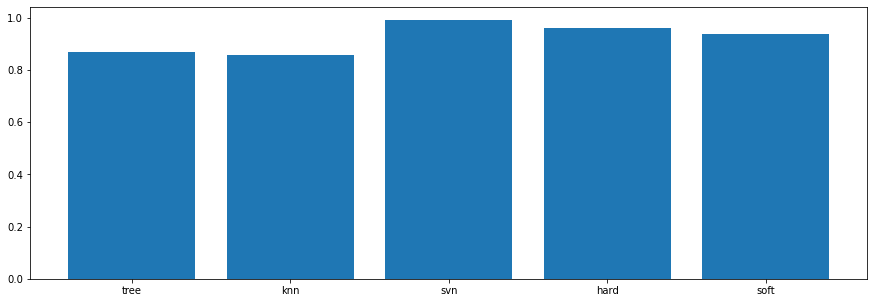

In [71]:
plt.figure(figsize = (15,5))

x = np.arange(5)

plt.bar(x, height = [accuracy_score(y_test, dt_pred),
                     accuracy_score(y_test, knn_pred),
                     accuracy_score(y_test, svm_pred),
                     accuracy_score(y_test, hard_voting_pred),
                     accuracy_score(y_test, soft_voting_pred),])

plt.xticks (x, ['tree', 'knn', 'svn', 'hard', 'soft'])

plt.show()
plt.close()

In [72]:
### 소프트 보팅
### 앙상블 구현을 위해서 (tree, logistic, knn ,svm)
### 앙상블 모델을 만들고
### 데이터 셋트 분리

### 보팅을 통해서 학습/예측/평가
# 최적으로 시각화를 진행

#### Bagging
- Random Forest(Decision Tree)

#### 1. load mnist datase

In [ ]:
mnist = load_digits()
# mnist.keys()
features, labels = mnist.data, mnist.target

#### 2. Cross validation

In [97]:
def user_cross_validation(classifier, features, labels) :
    cv_score = []
    
    for i in range(10) :
        scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')     
        cv_score.append ( scores.mean() )
        
    return cv_score

In [99]:
dt_cv_scores = user_cross_validation(DecisionTreeClassifier(), features, labels)
rt_cv_scores = user_cross_validation(RandomForestClassifier(), features, labels)

In [102]:
np.mean(dt_cv_scores)

0.8274130974549969

In [103]:
np.mean(rt_cv_scores)

0.949300744878957

- Decision Tree vs Random Forest Visualization

In [105]:
cv_list = [
    ['decision', dt_cv_scores],
    ['random forest', rt_cv_scores]
]

In [113]:
visualDF = pd.DataFrame.from_dict(dict(cv_list))
visualDF

,decision,random forest
0,0.822439,0.946570
1,0.821359,0.950472
2,0.825807,0.944907
3,0.828023,0.952691
4,0.822458,0.944910
5,0.829131,0.948802
6,0.830804,0.954361
7,0.835251,0.951027
8,0.823014,0.949351
9,0.835844,0.949916


<AxesSubplot:>

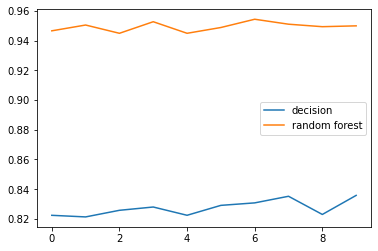

In [115]:
visualDF.plot()

In [116]:
# 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
# features.txt
# sep='\s+'

# 데이터프레임에 피처명을 컬럼으로 뷰여하기 위해 리스트 객체로 다시 반환

# 학습 피처 데이터세트와 테스트 피처 데이터를 데이터프레임으로 로딩
# 컬럼명은 feature_name 적용    

# 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명은 target으로 부여

# 파일 로딩이 끝나면 X_train, X_test, y_train, y_test 의 shape  및 데이터 확인


In [154]:
features = pd.read_csv('./data/human_activity/features.txt',
                       sep='\s+',
                       header = None,
                       names=['column_name'])
features

,column_name
0,tBodyAcc-Mean-1
1,tBodyAcc-Mean-2
2,tBodyAcc-Mean-3
3,tBodyAcc-STD-1
4,tBodyAcc-STD-2
...,...
556,tBodyGyro-AngleWRTGravity-1
557,tBodyGyroJerk-AngleWRTGravity-1
558,tXAxisAcc-AngleWRTGravity-1
559,tYAxisAcc-AngleWRTGravity-1


In [155]:
X_train = pd.read_csv('./data/human_activity/Train/X_train.txt',sep='\s+', header = None)
X_train.columns = features.loc [: , 'column_name']
X_train

column_name,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [156]:
X_test = pd.read_csv('./data/human_activity/Test/X_test.txt',sep='\s+', names=feature_list)
X_test.columns = features.loc [: , 'column_name']
X_test

NameError: name 'feature_list' is not defined

In [157]:
# 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명으 Target 으로 부여
y_train = pd.read_csv('./data/human_activity/Train/y_train.txt',sep='\s+', names=['target'])
y_train

,target
0,5
1,5
2,5
3,5
4,5
...,...
7762,2
7763,2
7764,2
7765,2


In [158]:
y_test = pd.read_csv('./data/human_activity/Test/y_test.txt',sep='\s+', names=['target'])
y_test

,target
0,5
1,5
2,5
3,5
4,5
...,...
3157,2
3158,2
3159,2
3160,2


In [159]:
print ('## 학습 피처 데이터 셋 info()')
X_train.info()

## 학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Columns: 561 entries, tBodyAcc-Mean-1 to tZAxisAcc-AngleWRTGravity-1
dtypes: float64(561)
memory usage: 33.2 MB


In [161]:
# target 분포
y_train['target'].value_counts()

5     1423
6     1413
4     1293
1     1226
2     1073
3      987
11      90
9       75
10      60
12      57
7       47
8       23
Name: target, dtype: int64

In [164]:
# 결측값 확인
X_train.isna().sum().sum()

0

In [170]:
tree_model = DecisionTreeClassifier (random_state = 100)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print ('결정트리 분루 정확도 : ', acc)

결정트리 분루 정확도 :  0.8020240354206198


In [171]:
print ('결정트리 하이퍼 파라미터 :', tree_model.get_params())

결정트리 하이퍼 파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 100, 'splitter': 'best'}


In [173]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(tree_model, param_grid = params, scoring='accuracy', cv = 5, verbose = 1)
grid_cv.fit (X_train, y_train)

print( 'GS CV 베스트 스코어 :', grid_cv.best_score_)
print( '최적의 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.6min finished


GS CV 베스트 스코어 : 0.8433136015235178
최적의 하이퍼 파라미터 : {'max_depth': 10}


In [175]:
grid_cv_df = pd.DataFrame(grid_cv.cv_results_)
grid_cv_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.821426
1,8,0.842030
2,10,0.843314
3,12,0.840353
4,16,0.836362
5,20,0.840354
6,24,0.840354


In [ ]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
